In [2]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/uoicorr' % p not in sys.path:
        sys.path.append('%s/uoicorr' % p)
    if '%s/PyUoI' % p not in sys.path:
        sys.path.append('%s/PyUoI' % p)

else:
    # And standard list of subdirectories
    if '%s\\pyuoi' % p not in sys.path:
        sys.path.append('%s\\pyuoi' % p)
    if '%s\\uoicorr' % p not in sys.path:
        sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [14]:
data = postprocess_dir('C:\\Users\\Ankit\\nse\\uoicorr\\data\\01312019')

(400, 25)


In [15]:
uoil = data.loc[data['exp_type'] == 'UoILasso']
uoien = data.loc[data['exp_type'] == 'UoIElasticNet']

In [38]:
# Plot estimation bias and estimation variance versus the choice of l2 regularization
est_reg = np.unique(uoil['est_reg'])
lasso_est_bias = np.zeros(est_reg.size)
lasso_est_var = np.zeros(est_reg.size)
lasso_mse = np.zeros(est_reg.size)

en_est_bias = np.zeros(est_reg.size)
en_est_var = np.zeros(est_reg.size)
en_mse = np.zeros(est_reg.size)

for i, er in enumerate(est_reg):
    # Calculate expectation and variance of the estimates across repititions
    d1 = uoil.loc[uoil['est_reg'] == er]
    d2 = uoien.loc[uoien['est_reg'] == er]
    
    bias = np.mean(d1.iloc[0].beta_hats - d1.iloc[0].betas, 0)
    lasso_est_bias[i] = np.linalg.norm(bias)**2
    lasso_est_var[i] = np.sum(np.var(d1.iloc[0].beta_hats, 0))

    bias = np.mean(d2.iloc[0].beta_hats - d2.iloc[0].betas, 0)
    en_est_bias[i] = np.linalg.norm(bias)**2
    en_est_var[i] = np.sum(np.var(d2.iloc[0].beta_hats, 0))
    
#     lasso_mse[i] = np.mean(np.diag((d1.iloc[0].beta_hats - d1.iloc[0].betas) @ (d1.iloc[0].beta_hats - d1.iloc[0].betas).T))
#     en_mse[i] = np.mean(np.diag((d2.iloc[0].beta_hats - d2.iloc[0].betas) @ (d2.iloc[0].beta_hats - d2.iloc[0].betas).T))

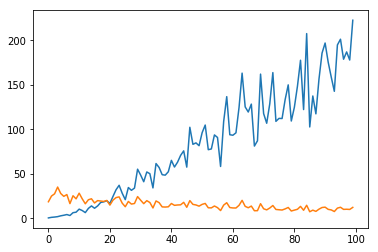

In [37]:
plt.plot(lasso_est_bias)
plt.plot(lasso_est_var)

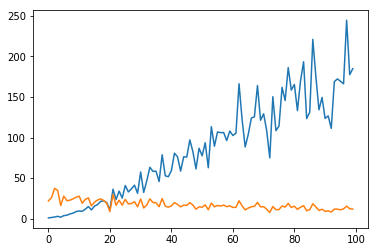

In [39]:
plt.plot(en_est_bias)
plt.plot(en_est_var)